In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Potential Theory
<hr style="border-width:4px; border-color:coral"></hr>

Potential theory is the theory of solutions to the equation

\begin{equation}
\nabla^2 u = 0
\end{equation}

where $\nabla^2 u = \nabla \cdot \nabla u = u_{xx} + u_{yy}$.  This operator is called the *Laplacian* and sometimes indicated using $\Delta u$.  

 ## A matrix analogy
<hr style="border-width:4px; border-color:coral"></hr>

Let $A$ be an $n \times n$ invertible matrix.   Then the solution to the matrix equation $A \mathbf x = \mathbf f$ for $\mathbf f \in \mathcal R^{n}$ is given by 

\begin{equation}
\mathbf x = A^{-1}\mathbf f
\end{equation}

Suppose we wrote $\mathbf f$ as a sum

\begin{equation}
\mathbf  f = \sum_{j=1}^{n} f_j \; \mathbf e^{(j)} 
\end{equation}

where $\mathbf e_i^{(j)} = \delta_{ij}$ are columns of the $n \times n$ identity matrix $\mathbf I$.  Then the solution to our matrix equation can be written as 

\begin{eqnarray}
\mathbf x & = A^{-1}\sum_{j=1}^n f_j \; \mathbf e^{(j)} \\
& = \sum_{j=1}^n f_j \; A^{-1} \mathbf e^{(j)}
\end{eqnarray}

If we let $\mathbf g^{(j)} = A^{-1} \mathbf e^{(j)}$, we can write the solution as 

\begin{equation}
\mathbf  x = \sum_{j=1}^{n} f_j \; \mathbf g^{(j)} 
\end{equation}

These "functions" $\mathbf g^{(j)}$ play a fundamental role for this problem.  They are the solutions to the matrix equation

\begin{equation}
A \mathbf x = \mathbf e^{(j)}
\end{equation}

where the $\mathbf e^{(j)}$ act as singular source terms or *impulse* functions.  The functions $g^{(j)}$ act as *fundamental solutions*, in that through the principle of superposition, we can solve any matrix equation involving $A$ if we know these fundamental solutions $g^{(j)}$. 

Of course, knowing these functions $\mathbf g^{(j)}$ is equivalent to knowing the matrix $A^{-1}$ and so would not lead to a practical solution technique.  Moreoever, even if we did know $A^{-1}$, whose columns are given by $\mathbf g^{(j)}$, each entry in $\mathbf x$ requires $2n - 1$ operations, resulting in an $\mathcal O(n^2)$ operation count to obtain $\mathbf x$. 



However, for linear systems arising from the discretization of PDEs may lend themselves to this approach. 

## Solving a 1d elliptic problem
<hr style="border-width:4px; border-color:coral"></hr>

We extend the analogy of the matrix equation to the 1d elliptic problem on $[0,1]$, given by 

\begin{equation}
u''(x) = f
\end{equation}

subject to $u(0) = a$, $u(1) = b$.  We can solve this problem by finding  fundamental solutions $G(x,y)$ satisfying

\begin{equation}
\frac{d^2 G(x,y)}{dx^2} = \delta(y - x)
\end{equation}

where $\delta(x)$ is a special function known as the "Dirac Delta function" that has properties analogous to the those for $\mathbf e^{(j)}$ in the matrix equation.   Although not really a function in a conventional sense, it is common to use the term "function" when referring to the Dirac delta function. 

The properties of the Dirac delta function are
1. \begin{equation}
   \int_{\mathcal R}\delta(x) \; dx = 1
   \end{equation}
   
2. For any function $f(x)$, 

\begin{equation}
f(x) = \int_{\mathcal R} f(y) \delta(y-x) \; dy
\end{equation}

There are several representations of the Dirac delta. One particularly useful one is given by 

\begin{equation}
\delta(x) = \lim_{t \to 0} \frac{1}{\sqrt{4 \pi t}} e^{-x^2/4t} \equiv \lim_{t \to 0} \delta_t(x)
\end{equation}

We can plot this function

<IPython.core.display.Javascript object>


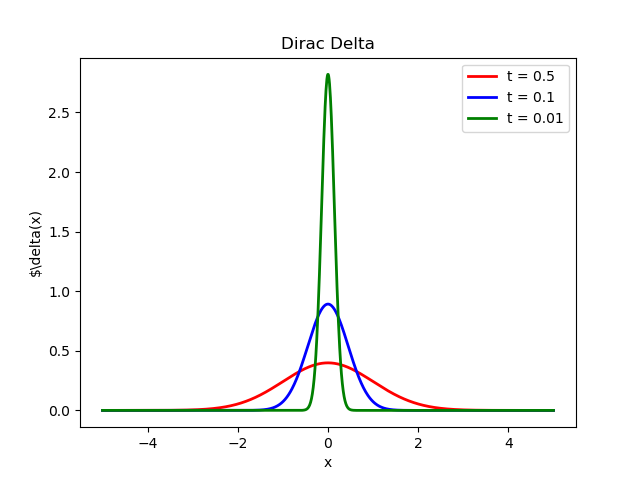

In [2]:
figure(1)
clf()

x = linspace(-5,5,1024)

def delta(x,t):
    return 1/sqrt(4*pi*t)*exp(-x**2/(4*t))
            
plot(x,delta(x,0.5),'r',linewidth=2,label='t = 0.5')
plot(x,delta(x,0.1),'b',linewidth=2,label='t = 0.1')
plot(x,delta(x,0.01),'g',linewidth=2,label='t = 0.01')


title('Dirac Delta')
xlabel('x')
ylabel('$\delta(x)')
legend()

To see that this particular choice satisfies the correct integral properties, we can approximate the integral by evaluation the sum 

\begin{equation}
\int_{\mathcal R} \delta_t(x) \; dx \approx \sum_{k=0}^{N} \delta_t(x_k) \Delta x
\end{equation}

where $\delta_t(x)$ is our discrete delta function. 

In [3]:
N = 1024
x = linspace(-3,3,N+1)
dx = 6/N
 
tv = logspace(-4,-1,4)
 
for t in flip(tv):
    print("t = {:.4f}  : {:16.8f}".format(t,sum(delta(x,t))*dx))


t = 0.1000  :       1.00000000
t = 0.0100  :       1.00000000
t = 0.0010  :       1.00000000
t = 0.0001  :       1.00000000


For our purposes, we will also use the following "heuristic" (which should be defined rigorously) : 

\begin{equation}
H'(x) = \delta(x)
\end{equation}

where $H(x)$ is the Heaviside function, define as $H(x) = 1$, $x > 0$ and 0 otherwise.    

To solve the 1d elliptic equation, we will solve for fundamental solutions $G(x,y)$, subject to $G(0,y) = G(1,y) = 0$.  In 1d, we can easily solve by integrating our elliptic problem twice.   For notational convenience, we will solve for $F(x)$ as a replacement for $G(x,y)$.   To solve for the fundamental solution $F(x)$, we write

\begin{equation}
F''(x) = \delta(x-y), \qquad F(0) = F(1) = 0
\end{equation}

Integrating once, and using our heuristic $H'(x) = \delta(x)$, we get

\begin{equation}
F'(x) = H(x-y) + C_0
\end{equation}

where $c_0$ is a constant of integration.  Integrating a second time, we get

\begin{equation}
F(x) = R(x-y) + C_0 x + C_1
\end{equation}

where $R(x)$ is the "ramp" function, defined as the anti-derivative of $H(x)$ and given by

\begin{equation}
R(x) = \left\{ \begin{array}{rc}
0 & x < 0 \\
x & x \ge 0
\end{array}\right.
\end{equation}

Imposing boundary conditions $F(0) = F(1) = 0$, we get our solution $F(x)$, which we now replace with $G(x,y)$ (since the fundamental solution $F(x)$ really does depend on $y$).  The resulting fundamental solution, called a Green's function, is given by

\begin{equation}
G(x,y) = \left\{ \begin{array}{rc}
(y - 1)x & 0 \le x \le y \\
y(x-1) & y \le x \le 1
\end{array} \right.
\end{equation}

Using this, our solution $u(x)$ is given by 

\begin{equation}
u(x) = \int_0^1 f(y) G(x,y) \; dy + \mbox{boundary conditions}
\end{equation}



<IPython.core.display.Javascript object>


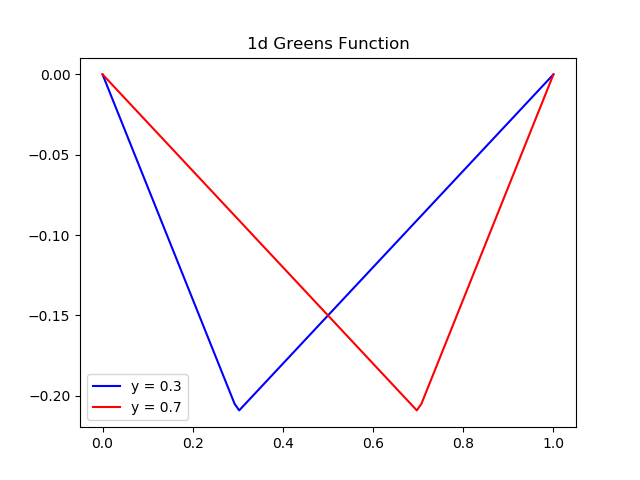

In [4]:
figure(2)
clf()

x = linspace(0,1,100)

def G(x,y):
    return where(x < y, (y-1)*x,0) +  where(y <= x, y*(x-1),0)
      
plot(x,G(x,0.3),'b',label='y = 0.3')
plot(x,G(x,0.7),'r',label='y = 0.7')


title('1d Greens Function')
legend()


## Connection to finite difference method
<hr style="border-width:4px; border-color:coral"></hr>

If we discretize the elliptic equation $u''(x) = f$ using a second order finite difference stencil, we can replace the continuous boundary value problem with a matrix equation

\begin{equation}
A \mathbf u = \mathbf f
\end{equation}

The solution is given by $\mathbf u = A^{-1} \mathbf f$.  If we replace $\mathbf f$ with 
$\mathbf e^{(j)}/h$, the solution will be a discrete version of the fundamental solution.  In fact, entry 
$(i,j)$ of $A^{-1}$ is exactly $G(x_i,y_j)$.  

Below, we demonstrate this by constructing an $(N-1) \times (N-1)$ tridiagnoal matrix $A$ corresponding to the three point stencil.  We form the inverse, and then define 

\begin{equation}
g^{(j)} = \frac{1}{h}\mbox{Col}_j(A^{-1})
\end{equation}

We then plot $g^{(j)}_i$ verses $x_i = ih, i = 1,2,3,\dots,N-1$.   

In [5]:
from scipy import linalg

N = 20
h = 1/N
x = linspace(0,1,N+1)
 
# Construct A and compute inv(A)
z = ones(N-1)
A = (diag(z[:-1],-1) -2*diag(z) + diag(z[:-1],1))/h**2
Ainv = inv(A)

<IPython.core.display.Javascript object>


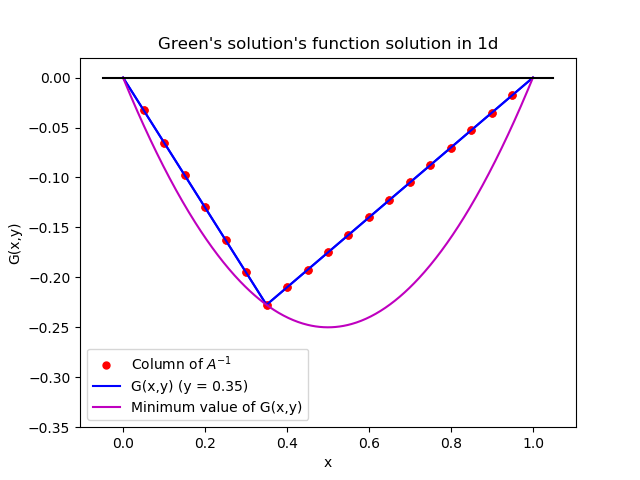

Difference G(x,y) - gJ/h  : 3.0531e-16


In [6]:
figure(3)
clf()


def G(x,y):
    return where(x < y, (y-1)*x,0) +  where(y <= x, y*(x-1),0)

# Choose Column J 
for J in [6]:    
    colJ = Ainv[:,J]

    # Discrete version of G(xJ,y)
    xJ = x[1:-1]
    gJ = colJ/h

    y = x[J+1]
    diff = abs(G(xJ,y) - gJ).max()
    print("Difference G(x,y) - gJ/h  : {:0.4e}".format(diff))
    
    # Plot column J of inv(A)
    plot(xJ,gJ,'r.',markersize=10)
    plot(x,G(x,y),'b')

  
plot(xJ,gJ,'r.',markersize=10,label='Column of $A^{-1}$')
plot(x,G(x,y),'b',label = f'G(x,y) (y = {y:.2})')
    
# Plot minimum values of Green's function as function of y
xf = linspace(0,1,512)
plot(xf, xf*(xf-1),'m',label='Minimum value of G(x,y)')

# Plot x-axis
plot(xlim(),[0,0],'k')

title('Green\'s solution\'s function solution in 1d')
xlabel('x')
ylabel('G(x,y)')

ylim([-0.35,0.02])

legend()

# gca().set_aspect('equal')

## Green's function as inverse operator
<hr style="border-width:4px; border-color:coral"></hr>

Just as the matrix inverse allows us to solve linear systems, the Green's function allows us to "invert" linear operators.   In the example above, if we have 

\begin{equation}
L[u] = u''(x) = f,  \qquad x \in [0,1]
\end{equation}

we can write the inverse as 

\begin{equation}
L^{-1}[u] = \int_0^1 f(y) G(x,y) \; dy
\end{equation}

### Solving elliptic problems computationally
<hr style="border-width:2px; border-color:black"></hr>

We can use this inverse operator to solve elliptic problems computationally by discretizing the integral using quadrature rules.  

Below, we use our finite difference approximation to solve

\begin{equation}
u''(x) = e^{-100(x-0.5)^2}
\end{equation}

on $[0,1]$, subject to $u(0) = u(1) = 0$.  


<IPython.core.display.Javascript object>


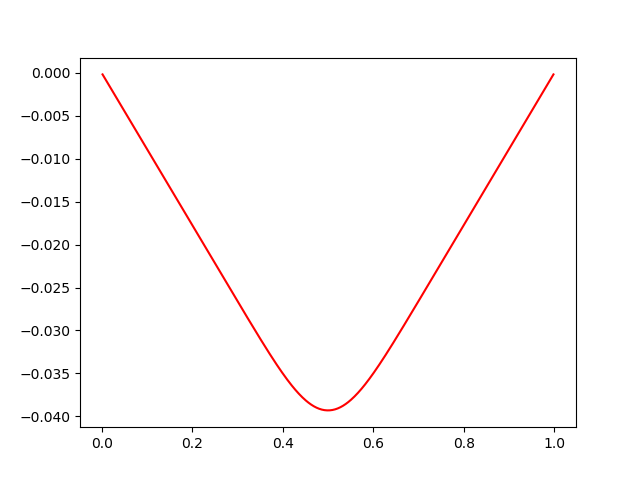

In [7]:
figure(4)
clf()

def rhs(x):
    return exp(-100*(x-0.5)**2)

N = 512
x = linspace(0,1,N+1)

f = rhs(x[1:-1])

h = 1/N

# Construct A and compute inv(A)
z = ones(N-1)
A = (diag(z[:-1],-1) -2*diag(z) + diag(z[:-1],1))/h**2
Ainv = inv(A)  

u = solve(A,f)

# plot(x[1:-1],f,'b')
plot(x[1:-1],u,'r')


### Using quadrature rules to approximate the integral
<hr style="border-width:2px; border-color:black"></hr>

One advantage of the integral formulation is that we have very accurate, well-conditioned methods for approximating definite integrals. 

In [18]:
# Example using 'quad'
from scipy.integrate import quad
from scipy.special import erf

# General quadtrature rule 
f = lambda x : 2/sqrt(pi)*exp(-x**2)
I =  quad(f,0,1)
print("Using quad                : {:20.16f}".format(I[0]))
print("Error (reported by quad)  : {:20e}".format(I[1]))
print("")

Itrue = erf(1)
error_true = abs(I[0]-Itrue)
print(f'True solution  : {Itrue:20.16f}')
print(f"Error          : {error_true:20e}")



Using quad                :   0.8427007929497149
Error (reported by quad)  :         9.355858e-15

True solution  :   0.8427007929497148
Error          :         1.110223e-16


## Delta sequences
<hr style="border-width:4px; border-color:coral"></hr>

Above, we saw that heat kernel, given by

\begin{equation}
\delta(x) = \lim_{t \to 0} \frac{1}{\sqrt{4 \pi t}} e^{-x^2/4t} \equiv \lim_{t \to 0} \delta_t(x)
\end{equation}
provides a good example of a function which converges to a $\delta$ function.   

We can also seek function sequences $S_k(x)$ that converge to Dirac delta functions, in the sense that 

\begin{equation}
\int_{-\infty}^{\infty} S_k(x) \; dx = 1
\end{equation}

and 
\begin{equation}
\lim_{k \to \infty} \int_{-\infty}^{\infty} f(x)S_k(x) \; dx = f(0)
\end{equation}

For example, the "hat" function
\begin{equation}
S_k(x) = \left\{\begin{array}{rc}
k & -1/2k \le k \le 1/2k \\
0 & |x| > 2k\end{array}\right.
\end{equation}
has integral equal to 1. 

Another example is related to the Sinc function and is given by 

\begin{equation}
S_k(x) = \frac{\sin kx}{\pi x}
\end{equation}

### Distributions
<hr style="border-width:2px; border-color:black"></hr>

It is awkward to work with sequences of functions, so we will work directly with the limit of the sequence.  Since these limiting "functions" which we will call "distributions".  
Recall that we use the notation $\langle \phi, f \rangle$ for an inner product.  We can also use the same notation to define a *linear functional*, that is, the action on  function.  

\begin{equation}
\langle \phi, f \rangle = \int_{-\infty}^{\infty} \phi(x) f(x) \; dx
\end{equation}

is an example if a linear functional.  The functional is linear in the sense that 

\begin{equation}
\langle \phi, a f + bg \rangle = a \langle \phi, f\rangle + b \langle \phi, g\rangle
\end{equation}

The main difference between the above and the usual inner product is that $\phi$ need not be a function in the usual sense, but can be something which effectively modifies the inner-product.  The Heaviside distribution and the delta-function distribution are two important examples. 

\begin{equation}
\langle H, f \rangle = \int_0^\infty f(x)\; dx
\end{equation}

and 

\begin{equation}
\langle \delta, f \rangle = f(0)
\end{equation}

A *dipole* distriution acts like the derivative of the $\delta$ function distribution. 

\begin{equation}
\langle \delta', f \rangle = -f'(0)
\end{equation}

It is very common to write

\begin{equation}
\langle \delta, f \rangle = \int_{-\infty}^{\infty} f(y) \delta(x-y) \; dy = f(x)
\end{equation}

which is misleading, because it suggests that we can evaluate the $\delta$ distribution pointwise. For this reason, it is better to think of the "delta function" as an operator which acts on a function, rather than a function itself. 

### Some properties of distributions
<hr style="border-width:2px; border-color:black"></hr>

For the following, we let $t$ be a distribution.  

1. Multiplication by a continuous function $f(x)$.  

   \begin{equation}
   ft \equiv \langle ft, g \rangle = \langle t, fg \rangle
   \end{equation}

   This follows directly from 
   
    \begin{equation}
    \langle ft, g \rangle = 
    \int_{-\infty}^{\infty} f(x) t(x) \; g(x) \; dx = 
    \int_{-\infty}^{\infty} t(x) \; f(x) g(x) \; dx
    \end{equation}


2.  We can change the scale of the distribution in the sense that 

    \begin{equation}
    t(ax) = \langle t(ax), f \rangle = \frac{1}{|a|} \langle t, f\left(\frac{x}{a}\right) \rangle
    \end{equation}

    Check : By substitution, we have

    \begin{equation}
    \langle t(ax), f \rangle = 
    \int_{-\infty}^{\infty} t(ax) \; f(x) \; dx = 
    \frac{1}{|a|} \int_{-\infty}^{\infty} t(u) \; f\left(\frac{u}{a}\right) \; du
    \end{equation}

    We can also shift the distribution to get 
    \begin{equation}
    t(x-y) = \langle t(x - y), f \rangle = \langle t, f(x+y) \rangle
    \end{equation}
    
    Check : Also by substitution.


3.  We can use integration by parts to show that 

\begin{equation}
t' = \langle t', f \rangle = - \langle t, f' \rangle
\end{equation}

Since $f$ is assumed to have compact support, there are no contributions from boundary terms at $\pm \infty$. 
  



## Green's functions for general 1d differential operators
<hr style="border-width:4px; border-color:coral"></hr>

We have already considered the equation in 1d
\begin{equation}
L[u] = u''(x) = \delta(x-y)
\end{equation}

on $[0,1]$.  We saw that the solution led to the Green's function solution

\begin{equation}
G(x,y) = \left\{ \begin{array}{rc}
(y - 1)x & 0 \le x \le y \\
y(x-1) & y \le x \le 1
\end{array} \right.
\end{equation}

Integration by parts can be used to show that the solution can then be expressed as 
\begin{equation}
L^{-1}[L[u]] = \int_0^1 G(x,y) u''(y) \; dy = \dots = u(x) = \int_0^1 G(x,y) f(y) \; dy
\end{equation}

Can this idea be generalized to more general linear operators of the form 

\begin{equation}
L[u] = a_n(x) \frac{d^n u}{dx^n} + a_{n-1}(x) \frac{d^{n-1} u}{dx^{n-1}} + \dots + a_0(x) u
\end{equation}

Using the 1d solution as a guide, we can seek a Green's function for the more general operator that satisfies

1. $L[G(x,y)] = 0, x \ne y$
<br></br>

2. $a_k(x) \frac{d^k G}{dx^k}$ is continuous for $k = 0,1,2,\dots,n-2$. 

3. $\left.\frac{d^{n-1} G}{dx^{n-1}}\right|_{y^-}^{y^+} = \frac{1}{a_n(x)}$

(Homework : Verify the above for the operator $L[u] = u''(x)$. )

In fact, the above conditions are necessary and sufficient conditions on the Green's function.



